# <center> Laptop Price Prediction

### Importing the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")
import pickle

In [2]:
df = pd.read_csv("./Clean laptop data.csv") #, encoding= 'unicode_escape')
df.head()

,brand,operating_system,RAM_nth,storage_nth,storage_type,cpu_benchmark,gpu_class,screen_size,PPI,warranty,refurbished,price
0,LENOVO,WINDOWS,2,6.906891,SSD,2501,4,15.6,141,0.0,YES,235.99
1,ASUS,WINDOWS,2,7.000000,SSD,3048,3,15.6,141,1.0,YES,236.99
2,LENOVO,WINDOWS,2,7.000000,SSD,3685,3,15.6,94,0.0,YES,259.99
3,HP,WINDOWS,2,7.000000,SSD,2689,4,15.6,94,0.0,YES,223.49
4,DELL,WINDOWS,3,7.000000,SSD,3256,3,14.0,157,0.0,YES,374.49


### Descriptive Statistics

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RAM_nth,1001.0,3.367632,0.799194,1.00,3.00,3.00,4.00,6.000000
storage_nth,1001.0,8.423842,1.165340,4.00,8.00,8.00,9.00,10.965784
cpu_benchmark,1001.0,12691.523477,7597.321238,548.00,7607.00,10505.00,17163.00,41175.000000
gpu_class,1001.0,2.724276,0.773240,1.00,2.00,3.00,3.00,4.000000
screen_size,1001.0,14.638561,1.333751,10.10,14.00,14.00,15.60,17.300000
PPI,1001.0,158.789211,34.039426,94.00,141.00,157.00,166.00,338.000000
warranty,1001.0,1.293457,0.919774,0.00,1.00,1.00,1.00,3.250000
price,1001.0,1071.419041,791.968578,95.99,499.99,861.49,1410.49,5987.490000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             1001 non-null   object 
 1   operating_system  1001 non-null   object 
 2   RAM_nth           1001 non-null   int64  
 3   storage_nth       1001 non-null   float64
 4   storage_type      1001 non-null   object 
 5   cpu_benchmark     1001 non-null   int64  
 6   gpu_class         1001 non-null   int64  
 7   screen_size       1001 non-null   float64
 8   PPI               1001 non-null   int64  
 9   warranty          1001 non-null   float64
 10  refurbished       1001 non-null   object 
 11  price             1001 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 94.0+ KB


### Checking for null percentage

In [5]:
df.isnull().mean()*100

brand               0.0
operating_system    0.0
RAM_nth             0.0
storage_nth         0.0
storage_type        0.0
cpu_benchmark       0.0
gpu_class           0.0
screen_size         0.0
PPI                 0.0
warranty            0.0
refurbished         0.0
price               0.0
dtype: float64

##### There are no null values.

#### Checking for duplicate values

In [6]:
df.duplicated().sum()

29

##### There are 29 duplicates in the dataset. So we are dropping the duplicate rows.

In [7]:
df.drop_duplicates(inplace= True)

#### Shape of the dataset

In [8]:
df.shape

(972, 12)

##### There are 972 records and 12 columns

#### Unique values in the categorical columns

In [9]:
df.columns

Index(['brand', 'operating_system', 'RAM_nth', 'storage_nth', 'storage_type',
       'cpu_benchmark', 'gpu_class', 'screen_size', 'PPI', 'warranty',
       'refurbished', 'price'],
      dtype='object')

In [10]:
df.brand.unique()

array(['LENOVO', 'ASUS', 'HP', 'DELL', 'ACER', 'MSI', 'MEDION', 'RAZER',
       'OTHER', 'GEO', 'APPLE', 'CHILLBLAST', 'AVITA', 'FUJITSU',
       'DYNABOOK'], dtype=object)

In [11]:
df.operating_system.unique()

array(['WINDOWS', 'CHROMEOS', 'MACOS'], dtype=object)

In [12]:
df.storage_type.unique()

array(['SSD', 'EMMC'], dtype=object)

In [13]:
df.refurbished.unique()

array(['YES', 'NO'], dtype=object)

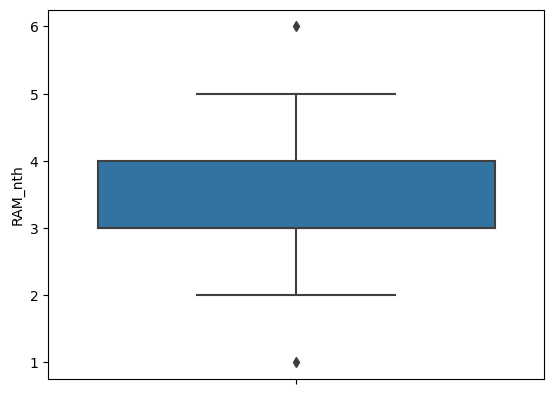

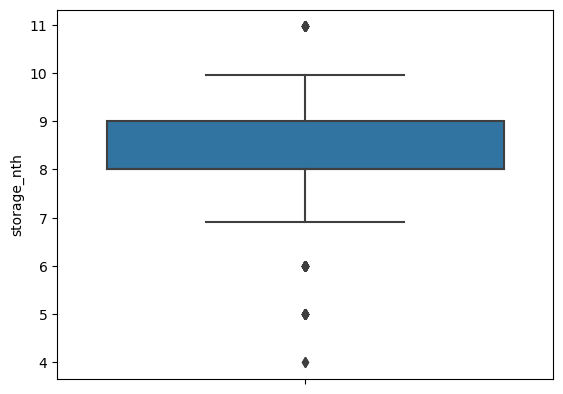

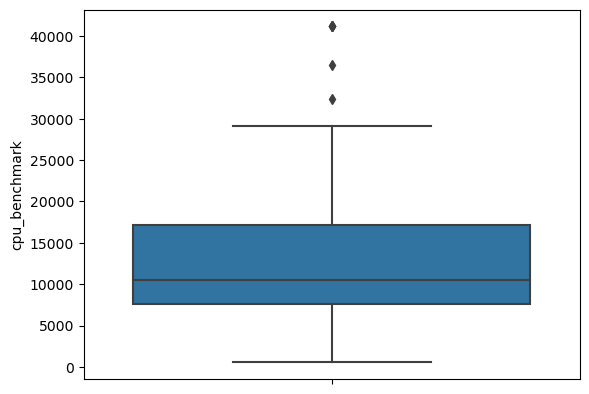

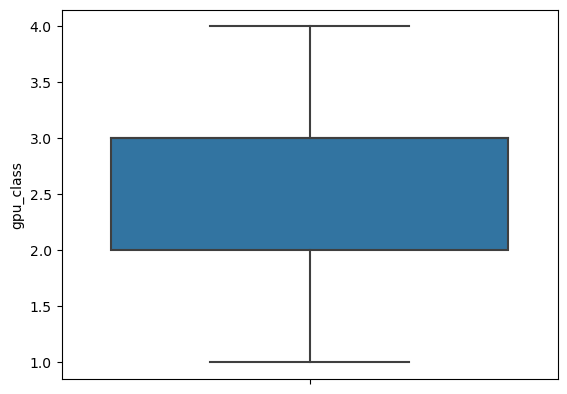

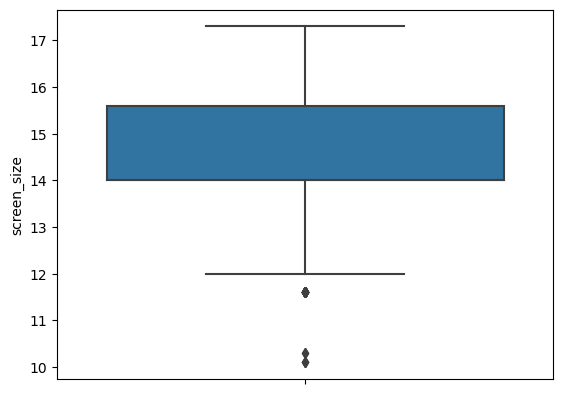

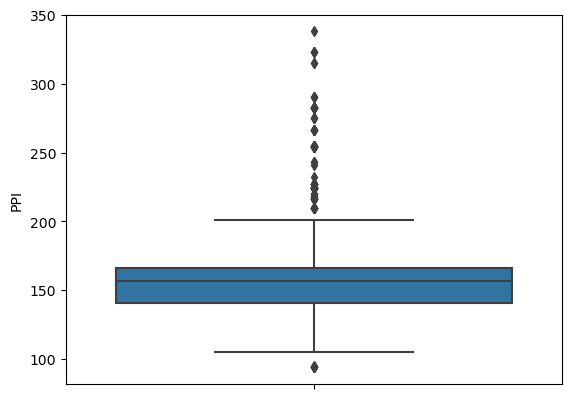

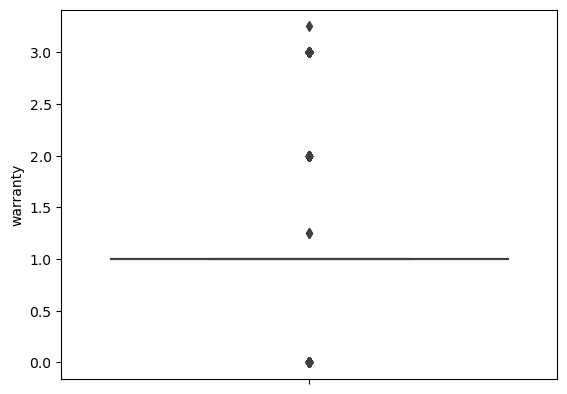

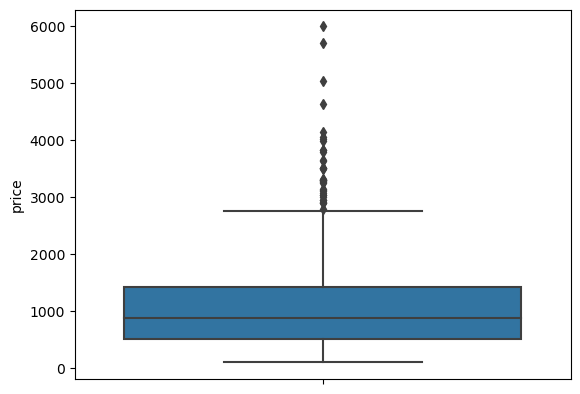

In [14]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.boxplot(data = df, y = df[i])
        plt.show()

In [15]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile(col, [75,25])
    IQR = Q3 - Q1
    UL = Q3 + 1.5 * IQR
    LL = Q1 - 1.5 * IQR
    return UL, LL

In [16]:
UL, LL = outlier_limit(df['price'])
df['price'] = np.where((df['price']> UL) | (df['price']<LL), np.nan, df['price'])

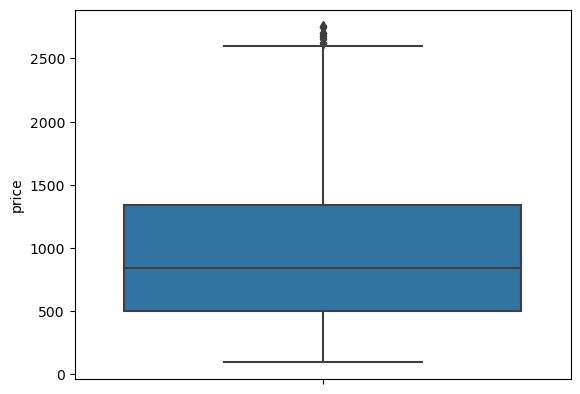

In [17]:
sns.boxplot(data = df, y = 'price')
plt.show()

In [18]:
df.isnull().mean()*100

brand               0.000000
operating_system    0.000000
RAM_nth             0.000000
storage_nth         0.000000
storage_type        0.000000
cpu_benchmark       0.000000
gpu_class           0.000000
screen_size         0.000000
PPI                 0.000000
warranty            0.000000
refurbished         0.000000
price               3.806584
dtype: float64

In [19]:
df.dropna(inplace= True)

In [20]:
le = LabelEncoder()

In [21]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])

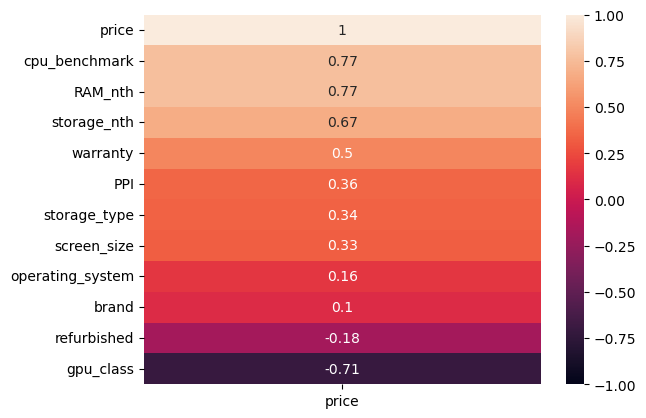

In [22]:
sns.heatmap(df.corr()[['price']].sort_values(by= 'price', ascending = False), vmin= -1, vmax= 1, annot= True)
plt.show()

In [23]:
df.head()

,brand,operating_system,RAM_nth,storage_nth,storage_type,cpu_benchmark,gpu_class,screen_size,PPI,warranty,refurbished,price
0,10,2,2,6.906891,1,2501,4,15.6,141,0.0,1,235.99
1,2,2,2,7.000000,1,3048,3,15.6,141,1.0,1,236.99
2,10,2,2,7.000000,1,3685,3,15.6,94,0.0,1,259.99
3,9,2,2,7.000000,1,2689,4,15.6,94,0.0,1,223.49
4,5,2,3,7.000000,1,3256,3,14.0,157,0.0,1,374.49


In [24]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .20, random_state= 42, shuffle= True)

In [26]:
from sklearn.feature_selection import f_regression, SelectKBest

In [27]:
fs = SelectKBest(score_func= f_regression, k = 'all')

In [28]:
fs.fit(x_train, y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x000001A3AD830DC0>)

In [29]:
for i in range(len(fs.scores_)):
    print(f"Feature is : {i} and score is {fs.scores_[i]}")

Feature is : 0 and score is 8.529066556232047
Feature is : 1 and score is 23.851836858799235
Feature is : 2 and score is 1102.5071179203462
Feature is : 3 and score is 666.3070965522088
Feature is : 4 and score is 100.01779318094853
Feature is : 5 and score is 1199.9059310519613
Feature is : 6 and score is 800.4366091973685
Feature is : 7 and score is 95.48158872899123
Feature is : 8 and score is 128.34511454142105
Feature is : 9 and score is 212.7661560062174
Feature is : 10 and score is 22.91773250541424


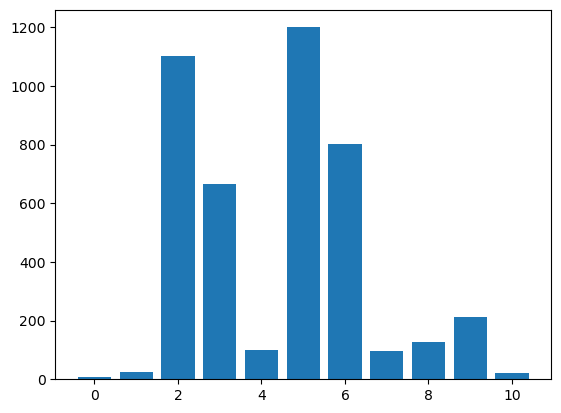

In [30]:
plt.bar([ i for i in range( len(fs.scores_))], fs.scores_)
plt.show()

In [31]:
fs = SelectKBest(score_func= f_regression, k = 9)

In [32]:
fs.fit(x_train, y_train)

SelectKBest(k=9, score_func=<function f_regression at 0x000001A3AD830DC0>)

In [33]:
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [34]:
models = {
   'GradientBoostingRegressor' : GradientBoostingRegressor(random_state= 42)}

In [35]:
for name, model in models.items():
    model.fit(x_train_fs, y_train)
    print("Model trained with {}".format(name))
    training_score = model.score(x_train_fs, y_train)*100
    testing_score = model.score(x_test_fs, y_test)*100
    score = r2_score(y_test, model.predict(x_test_fs))*100
    mae = mean_absolute_error(y_test, model.predict(x_test_fs))
    mse = mean_squared_error(y_test, model.predict(x_test_fs))
    rmse = np.sqrt(mse)
    print("r2_score is : ", score)
    print("Training score is : ", training_score)
    print("Testing score is : ", testing_score)
    print("Mean absolute error is : ", mae)
    print("Mean squared error is : ", mse)
    print("RMSE is : ", rmse)
    print('*'*100)

Model trained with GradientBoostingRegressor
r2_score is :  81.76544013642551
Training score is :  91.48841190666042
Testing score is :  81.76544013642551
Mean absolute error is :  181.50057664919314
Mean squared error is :  64838.12040829031
RMSE is :  254.63330577183007
****************************************************************************************************


In [36]:
model = GradientBoostingRegressor(learning_rate= 0.1, n_estimators= 149, random_state= 76)

In [37]:
model.fit(x_train_fs, y_train)

GradientBoostingRegressor(n_estimators=149, random_state=76)

In [38]:
y_pred = model.predict(x_test_fs)

In [39]:
model.score(x_train_fs, y_train)

0.9263840466544327

In [40]:
model.score(x_test_fs, y_test)

0.8267850433770447

In [41]:
r2_score(y_pred, y_test)

0.799154606939858

In [42]:
pickle.dump(model,open('MODEL.pkl', 'wb'))